In [97]:

%load_ext autoreload
%autoreload 2

import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
periods, ppp, itraj = 5, 1000, 0

In [99]:
histories={}
for k in range(1,9):
    #hist_A, hist_loss, hist_grads
    try:
        histories[k] = load_train_results(periods=periods, ppp=ppp, train_id=k)
    except Exception:
        pass

In [101]:
histories[4][0]

array([[[-3.6763173e-02, -1.3567729e-02],
        [ 5.4920781e-03, -1.9152090e-04]],

       [[-4.5749933e-02, -4.3709949e-03],
        [-3.5938304e-03, -9.1197677e-03]],

       [[-5.4902039e-02,  4.9636727e-03],
        [-1.2835533e-02, -1.8221077e-02]],

       ...,

       [[-1.6646923e-01,  2.5482457e+00],
        [-2.6028507e+00, -9.9480897e-02]],

       [[-1.6647919e-01,  2.5482159e+00],
        [-2.6028602e+00, -9.9481523e-02]],

       [[-1.6648492e-01,  2.5481865e+00],
        [-2.6028733e+00, -9.9478453e-02]]], dtype=float32)

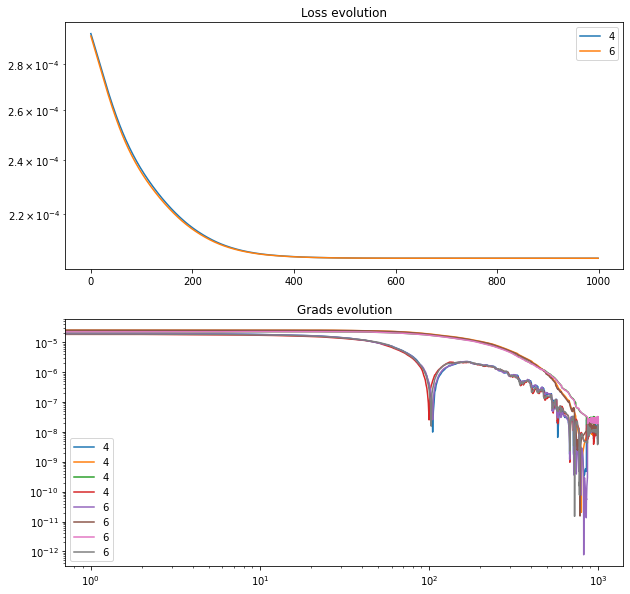

In [102]:
fig_size=(10,10)
fig = plt.figure(figsize=fig_size)

fig = display_histories(fig,histories)


In [104]:
for k in list(histories.keys()):
    print(histories[k][0][-1], "\n")

[[-0.16648492  2.5481865 ]
 [-2.6028733  -0.09947845]] 

[[-0.16599149  2.5498216 ]
 [-2.6023343  -0.09931184]] 

